# <font color=#cd0000> Propósito principal </font>
- La idea de este librillo es preparar el entorno para realizar pruebas para cualquier DataSet a ser clasificado por cualquier codificación aplicada a LSTM

## <font color=#cd0000> Leyenda </font>
- Los apartados titulados con el código de colores HEX: `#cd0000` serán apartados que tendrán todos los librillos, en concreto, aquellos especificados en el apartado `Síntesis de los criterios usados` del trabajo.
- Los apartados titulados con el código de colores HEX: `#2451ff` serán apartados de conclusiones propias de este librillo resultado de aplicar un estudio personalizado para cada planteamiento.

# <font color=#cd0000> Prerrequisitos </font>
## <font color=#cd0000> Entorno de ejecución </font>
- Cambiamos el directorio raíz del librillo para acceder cómodamente a las funciones de utilidad.

In [7]:
import os

os.chdir('../..')

## <font color=#cd0000> Constantes y variables predefinidas </font>
- TODO -> Añadir SEED a todas las particiones.

In [8]:
HEARTBEAT_PATH = "data/heartbeat"
EPILEPSY_PATH = "data/epilepsy"
SEGUIMIENTO_OCULAR_PATH = "data/seguimiento-ocular/Data/Hospital"
SEGUIMIENTO_OCULAR_FOLDERS_ID = range(1, 12+1)

SEED = 1

# <font color=#cd0000> Carga del Dataset </font>
- TODO: Breve descripción

In [9]:
# TODO - Change with known data
from utils.load_data import import_epilepsy_dataset

train, test = import_epilepsy_dataset(EPILEPSY_PATH)


# <font color=#cd0000> Preprocesamiento </font>

## <font color=#cd0000> Eliminación de datos inválidos y valores atípicos </font>
- TODO: Breve descripción de qué es un dato inválido (-1's en columna, etc.)
- Eliminaremos aquellos valores fuera de los percentiles 5 y 95.
- TODO: Definiremos cuál será el límite de outliers permitido por serie temporal

In [10]:
# TODO - Remove invalid data

In [11]:
# train.remove_outliers(headers=train.get_derived_data_columns()['attrs'], outliers_limit=0.9)
# test.remove_outliers(headers=test.get_derived_data_columns()['attrs']) -> Estos no los podemos alterar

In [12]:
import pandas as pd

# Remaining series
print("Previous number of series: {}".format(
    len(pd.unique(train.original_data['id']))))
print("Actual number of series: {}".format(
    len(pd.unique(train.derived_data['id']))))


Previous number of series: 137
Actual number of series: 137


## <font color=#cd0000> Normalización </font>

In [13]:
from utils.codifications import standardize_data

train.derived_data, test.derived_data = standardize_data(
    train.derived_data, test.derived_data, headers=train.get_derived_data_columns()['attrs'])

In [14]:
train.derived_data

,id,TimeStamp,dim_0,dim_1,dim_2,class
0,0,0,0.289366,0.500435,1.273516,epilepsy
1,0,1,0.340997,0.294458,1.195417,epilepsy
2,0,2,0.382303,-0.411747,1.214941,epilepsy
3,0,3,0.413282,-0.039028,1.058743,epilepsy
4,0,4,0.423608,-0.107687,1.078268,epilepsy
...,...,...,...,...,...,...
28217,136,201,-0.154668,-0.647149,-0.874208,sawing
28218,136,202,-0.185647,-0.176346,-0.444663,sawing
28219,136,203,0.681767,0.108098,-0.171317,sawing
28220,136,204,1.229064,-0.303855,-0.268940,sawing


## <font color=#cd0000> Resoluciones a aplicar </font>
- TODO:
  - Si las series son rápidas (muchos cambios en poco tiempo) especificar resoluciones altas (sin modificaciones).
  - Si las series son lentas (pocos cambios en mucho tiempo) especificar resoluciones bajas (eliminamos datos).

In [15]:
# Series lentas
train.reduce_sampling_rate(remove_one_each_n_samples=2)
test.reduce_sampling_rate(remove_one_each_n_samples=2)

In [16]:
train.derived_data

,id,TimeStamp,dim_0,dim_1,dim_2,class
0,0,1,0.340997,0.294458,1.195417,epilepsy
1,0,3,0.413282,-0.039028,1.058743,epilepsy
2,0,5,0.413282,0.471009,1.293041,epilepsy
3,0,7,0.361650,-0.284238,1.429714,epilepsy
4,0,9,0.310018,-0.568682,1.781160,epilepsy
...,...,...,...,...,...,...
14106,136,197,-0.309563,-0.450981,0.062981,sawing
14107,136,199,1.187759,-1.019869,-0.307990,sawing
14108,136,201,-0.154668,-0.647149,-0.874208,sawing
14109,136,203,0.681767,0.108098,-0.171317,sawing


# <font color=#cd0000> Codificación </font>
- TODO: Breve descripción de la codificación

In [17]:
from utils.codifications import temporal_trend_fn

train.apply_codifications([temporal_trend_fn])
test.apply_codifications([temporal_trend_fn])

train.derived_data

,id,TimeStamp,dim_0,dim_0Diff,dim_1,dim_1Diff,dim_2,dim_2Diff,class
0,0,3,0.413282,0.072284,-0.039028,-0.333486,1.058743,-0.136673,epilepsy
1,0,5,0.413282,0.000000,0.471009,0.510037,1.293041,0.234297,epilepsy
2,0,7,0.361650,-0.051632,-0.284238,-0.755247,1.429714,0.136673,epilepsy
3,0,9,0.310018,-0.051632,-0.568682,-0.284444,1.781160,0.351446,epilepsy
4,0,11,0.113818,-0.196201,0.981047,1.549729,1.937358,0.156198,epilepsy
...,...,...,...,...,...,...,...,...,...
13969,136,197,-0.309563,-1.394058,-0.450981,-0.510037,0.062981,0.585743,sawing
13970,136,199,1.187759,1.497322,-1.019869,-0.568888,-0.307990,-0.370970,sawing
13971,136,201,-0.154668,-1.342426,-0.647149,0.372720,-0.874208,-0.566218,sawing
13972,136,203,0.681767,0.836435,0.108098,0.755247,-0.171317,0.702891,sawing


In [18]:
X_train, _ = train.transform_derived_data_into_X_y()
X_test, _ = test.transform_derived_data_into_X_y()

y_train = train.derived_data.groupby('id').first()['class'].to_numpy()
y_test = test.derived_data.groupby('id').first()['class'].to_numpy()

## <font color=#cd0000> Codificación de la entrada </font>

In [19]:
# All lengths must be equal
series_length = train.get_shortest_serie().shape[0]
n_dims = len(train.get_derived_data_columns()['attrs'])

(
    train.get_shortest_serie().shape[0],
    train.get_largest_serie().shape[0],
    test.get_shortest_serie().shape[0],
    test.get_largest_serie().shape[0]
)

(102, 102, 102, 102)

In [20]:
import pandas as pd

# This will determine the number of series of each split
train_n_series = pd.unique(train.derived_data['id']).shape[0]
test_n_series = pd.unique(test.derived_data['id']).shape[0]

(train_n_series, test_n_series)


(137, 138)

In [21]:
# Just in case
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

sequences_incrementer = 2

# We reshape the series in order to give them to the LSTM's units
# (number_sequences, batch_size//timesteps, n_dimensions)
# We divide the data into windows
X_train = X_train.reshape(train_n_series*sequences_incrementer,
                          int(series_length/sequences_incrementer), n_dims)
X_test = X_test.reshape(test_n_series*sequences_incrementer,
                        int(series_length/sequences_incrementer), n_dims)


## <font color=#cd0000> Codificación de la salida </font>

In [22]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()


In [23]:
import numpy as np

# We need the same number of classes as sequences
y_train = np.repeat(y_train, repeats=sequences_incrementer, axis=0)
y_test = np.repeat(y_test, repeats=sequences_incrementer, axis=0)


# <font color=#cd0000> Diseño de la topología de red </font>
- TODO:
  - Nº unidades LSTM (rangos a variar)
  - Funciones de activación
  - Tamaño por lote (batch_size)
  - Neuronas de salida
    - Una con activación sigmoidal si es binaria
    - Tantas como clases haya con activación softmax + argmax para decidir qué clase será la elegida.
      - Para hacer esto -> `k.argmax`
  - ...

In [24]:
import keras as k
from keras.models import Sequential
from keras.layers import LSTM, Dense

nn = Sequential()

# Number of initial dimensions
nn.add(LSTM(units=12, dropout=.2, recurrent_dropout=.2, unroll=True))
# Number of Epilepsy's classes
nn.add(Dense(4, activation='sigmoid'))

## <font color=#cd0000> Compilación de la red </font>
- TODO:
  - Optimizador -> reajuste de pesos
    - Función de pérdida
  - Función de pérdida
  - Métricas

In [25]:
from keras.optimizers import RMSprop

metrics = [
    k.metrics.CategoricalAccuracy(name="ACC"),
    k.metrics.Precision(name='Prec'),
    k.metrics.Recall(name='Rec'),
    k.metrics.AUC(name='AUC')
]
nn.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=metrics)


## <font color=#cd0000> Visualización de resultados preliminares </font>
- TODO:
  - Verificar sobreajuste y tomar medidas en caso de darse:
    - Regularizadores L1L2
    - Tasa de Dropout
    - Decrementar épocas de entrenamiento
  - Si tarda en converger:
    - Inicializar correctamente los pesos (GlorotNormal, ...)

In [26]:
import matplotlib.pyplot as plt


def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()


# <font color=#cd0000> Entrenamiento del modelo </font>

In [27]:
def argmax(x):
    prediction = np.zeros(4)
    prediction.put(x, 1)
    return prediction

Epoch 1/200
9/9 [==============================] - 3s 311ms/step - loss: 1.3738 - ACC: 0.2993 - Prec: 0.2908 - Rec: 0.6241 - AUC: 0.5564 - val_loss: 1.3624 - val_ACC: 0.4348 - val_Prec: 0.3147 - val_Rec: 0.6123 - val_AUC: 0.6002
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 1.3708 - ACC: 0.3394 - Prec: 0.2963 - Rec: 0.6423 - AUC: 0.5644 - val_loss: 1.3612 - val_ACC: 0.4348 - val_Prec: 0.3155 - val_Rec: 0.6196 - val_AUC: 0.6035
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 1.3719 - ACC: 0.3431 - Prec: 0.2835 - Rec: 0.6022 - AUC: 0.5614 - val_loss: 1.3602 - val_ACC: 0.4348 - val_Prec: 0.3216 - val_Rec: 0.6304 - val_AUC: 0.6057
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 1.3715 - ACC: 0.3102 - Prec: 0.2852 - Rec: 0.6058 - AUC: 0.5635 - val_loss: 1.3592 - val_ACC: 0.4384 - val_Prec: 0.3223 - val_Rec: 0.6341 - val_AUC: 0.6084
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 1.3678 - ACC: 0.372

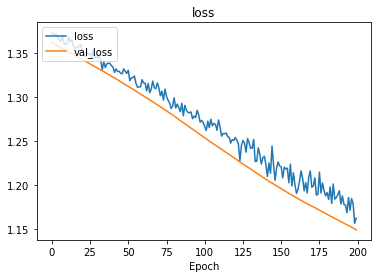

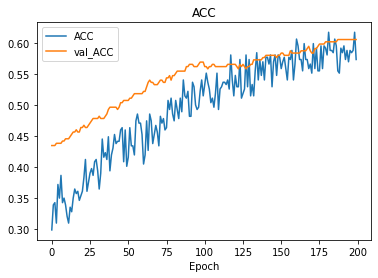

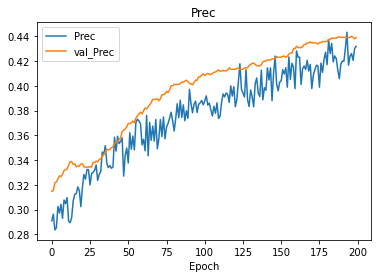

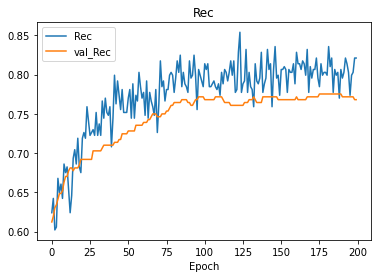

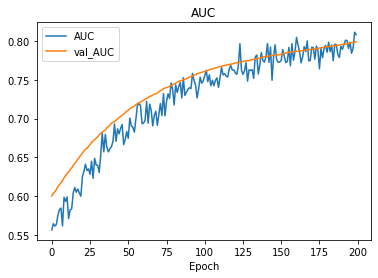

In [28]:
import numpy as np
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report

epochs = 200

history = nn.fit(X_train, y_train, epochs=epochs,
                 validation_data=(X_test, y_test))
nn.summary()
print('\n\n')

y_pred = nn.predict(X_test)
y_pred = np.asarray(list(map(lambda x: argmax(x), K.argmax(y_pred))))

show_metrics(history)

In [29]:
y_real = enc.inverse_transform(y_test)
y_pred = enc.inverse_transform(y_pred)
print(confusion_matrix(y_real, y_pred))
print(classification_report(y_real, y_pred, zero_division=0))

[[ 7 18 41  2]
 [ 0 34 17 23]
 [ 0  0 59  1]
 [ 0  0  7 67]]
              precision    recall  f1-score   support

    epilepsy       1.00      0.10      0.19        68
     running       0.65      0.46      0.54        74
      sawing       0.48      0.98      0.64        60
     walking       0.72      0.91      0.80        74

    accuracy                           0.61       276
   macro avg       0.71      0.61      0.54       276
weighted avg       0.72      0.61      0.55       276



# <font color=#cd0000> Randomized Search </font>
- Búsqueda de hiper-parámetros aleatoria con LSTM maximizando ``macro avg f1-score``

In [ ]:

import random
import pickle
from utils.classifier_utils import (windowed_cross_val,
                                    compute_classification_reports_means)
from utils.plot_utils import pretty_print_classification_report_dict

PKL_DIR = 'pkl/LSTM/'


# TODO

def smts_randomized_search_cv(
        windowed_series,
        relation_with_series,
        prefix,
        cv=5):
    global PKL_DIR
    all_clf_used = {}

    n_samples = 5
    j_ins_list = random.sample([20, 50, 100, 150, 200], n_samples)
    n_symbols_list = random.sample([20, 50, 100, 150, 200], n_samples)

    best_hyp_params = None
    best_score = 0
    for j_ins in j_ins_list:
        for n_symbols in n_symbols_list:
            clf_used = {}
            clf = SMTS(
                j_ins=j_ins,
                n_symbols=n_symbols,
                random_state=SEED
            )

            reports = windowed_cross_val(
                clf,
                windowed_series,
                relation_with_series,
                cv=cv,
                drop_columns=['class'],
                custom_estimator=True,
                seed=SEED
            )
            mean_report = compute_classification_reports_means(reports)
            all_clf_used[(j_ins, n_symbols)] = (clf_used, str(mean_report))

            if mean_report['macro avg']['f1-score'] >= best_score:
                best_score = mean_report['macro avg']['f1-score']
                best_hyp_params = (j_ins, n_symbols)
                best_report = mean_report

            print("\t\t--------------ACTUAL BEST: J_ins={}; N_symbols={}--------------"
                  .format(best_hyp_params[0], best_hyp_params[1]))
            pretty_print_classification_report_dict(best_report)
            print("\t\t--------------ITERATION: J_ins={}; N_symbols={}--------------"
                  .format(j_ins, n_symbols))
            pretty_print_classification_report_dict(mean_report)

    with open(PKL_DIR + prefix, 'wb') as file:
        pickle.dump(all_clf_used, file)

    return best_hyp_params, best_report


In [ ]:
# TODO

# <font color=#cd0000> Análisis de resultados </font>
- TODO - Un breve análisis de los resultados obtenidos para las diferentes resoluciones, ventanas, ...
- Visualización de gráficos para determinar si se pueden obtener mejores resultados con una serie de hiper-parámetros concretos.

In [ ]:
# TODO

# <font color=#cd0000> Conclusiones </font>
- TODO - Unas breves conclusiones sobre los resultados obtenidos (influencia de la codificación, ...)